# APS 8

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

#### Respostas

a) novo preço médio é 60,00 reais e o desvio padrão continua o mesmo, 15,00 reais.

b) novo preço médio é 67,50 reais e o desvio padrão e o desvio padrão é igual a [(1.5)^2]*25 que é igual a 56.25

c) preço esperado é de 45,00 reais cada e o desvio padrão é [(10)^2]*25 = 2500 , já que os preços de um produto em uma mesma loga é o mesmo. Como serão comprados 10 multímetros, o preço total final esperado é de 450,00 reais.



## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


In [46]:
#valores 
vprojeto = 1
vprova = 1.5**2
c = 0.675

#média final = 1/2 * média de projetos + 1/2 * média das provas
medf = (1/2)*7 + (1/2)*4
despadf = (varf)**(0.5)
varf = (((1/2)**2)*vprova) + (((1/2)**2)*vprojeto) + 2*(0.5)**2*c


print("Média final = {0}".format(medf))
print("Desvio padrão = {0}".format(despadf))

x = 1-stats.norm.cdf(5,loc = medf, scale = despadf)
print("A probabilidade de um aluno ser aprovado é de {0}".format(x*100))

Média final = 5.5
Desvio padrão = 1.0723805294763609
A probabilidade de um aluno ser aprovado é de 67.94825785008082


### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

In [8]:
houses = pd.read_csv("casas.csv")

In [9]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


In [19]:
houses['price'].describe() 

count    6.500000e+01
mean     5.667223e+05
std      3.069587e+05
min      1.220000e+05
25%      3.499000e+05
50%      5.250000e+05
75%      6.915000e+05
max      1.749000e+06
Name: price, dtype: float64

## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


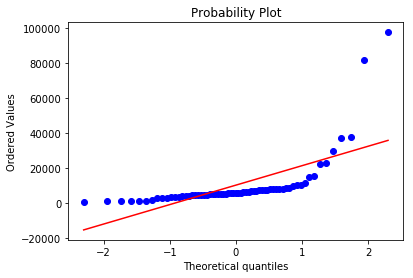

In [48]:
#a)
x = houses.sqft_lot
stats.probplot(x, dist='norm', plot=plt)
plt.show()

In [ ]:
#b) Um teste de hipóteses
#c) Sim. Não.

In [52]:
#d)
am = []
for i in houses.sqft_lot:
    am.append(i)
    
alpha = 0.05
n = len(am)
s = np.std(am, ddof=1)
m_ = np.mean(am)
lista = []
for i in range(10000):
    a = np.random.choice(am,size = n, replace = True).mean()
    lista.append(a)
a

7292.2307692307695

In [54]:
#e)
print(pd.Series(lista).quantile(alpha/2))
print(pd.Series(lista).quantile(1-(alpha/2)))

6909.113076923077
14478.841538461533


## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

In [55]:
y = houses.price
x = houses["sqft_living"]
x = sm.add_constant(x, prepend=True)
res = sm.OLS(y,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        15:48:00   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510     -9.95e+04  1.98e+05
sqft_living   247.0810     32.954      7.498      0.000       181.227   312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
c = 4.928e4
s = 247.0810
print("B0 = ",c)
print("B1 = ",s)

B0 =  49280.0
B1 =  247.081


**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

In [59]:
print("R^2 é oo grau de influência entre duas variáveis")
print("P>|t| é a probabilidade de duas variáveis não serem dependentes")

R^2 é oo grau de influência entre duas variáveis
P>|t| é a probabilidade de duas variáveis não serem dependentes


**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


In [61]:
#c) 

print("y = {0} + {1} x ".format(c,s))

y = 49280.0 + 247.081 x 


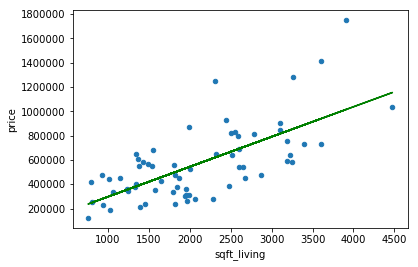

In [64]:
#d)

houses.plot.scatter("sqft_living","price")
y = 49280 + 247.081*houses["sqft_living"]
plt.plot(houses['sqft_living'],y,'green')

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)

In [ ]:
#a) O grau de influência entre uma variável e outra.

In [65]:
#b)

y = houses['price']
x = houses.loc[:, ['sqft_lot', 'sqft_basement']]
x = sm.add_constant(x, prepend=True)
res = sm.OLS(y,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9115
Date:                Tue, 28 Nov 2017   Prob (F-statistic):              0.407
Time:                        15:58:11   Log-Likelihood:                -912.03
No. Observations:                  65   AIC:                             1830.
Df Residuals:                      62   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          5.237e+05   5.01e+04     10.462      0.000      4.24e+05  6.24e+05
sqft_lot          2.7668      2.383      1.161      0.250        -1.997     7.531
sqft_basement    68.6891    101.802      0.675      0.502      -134.810   272.188
==============================================================================
Omnibus:                       24.116   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.221
Skew:                           1.369   Prob(JB):                     5.02e-09
Kurtosis:                       5.572   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
c = 5.237e05
s = 2.7668	
B2 = 68.6891
y = c + s*houses["sqft_lot"] + B2*houses["sqft_basement"]
print(y)

0     551188.1580
1     537539.5336
2     607101.2300
3     545687.9562
4     533699.2152
5     793908.4548
6     571495.0192
7     602092.1360
8     540300.8000
9     650833.6640
10    626391.7544
11    538925.7004
12    537534.0000
13    538317.0044
14    531225.6960
15    535013.4452
16    543620.9600
17    584950.6256
18    536917.0036
19    540519.3772
20    553374.5880
21    547632.4236
22    536150.6000
23    532622.9300
24    543897.6400
25    545585.3880
26    566845.6758
27    526109.8828
28    536867.2012
29    538319.7712
         ...     
35    542284.5956
36    648802.5078
37    548515.0328
38    565202.0000
39    536601.5884
40    615476.2670
41    552751.4000
42    698601.4782
43    613526.0028
44    543665.2288
45    750278.7856
46    531350.2020
47    534767.2000
48    586534.0280
49    526480.6340
50    542077.0856
51    546373.9260
52    545845.4672
53    533107.1200
54    592112.9480
55    526336.7604
56    538308.7040
57    538117.7948
58    539747.4400
59    5328